In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nData Info:")
df.info()

Shape: (440, 8)

Columns:
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
numeric_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

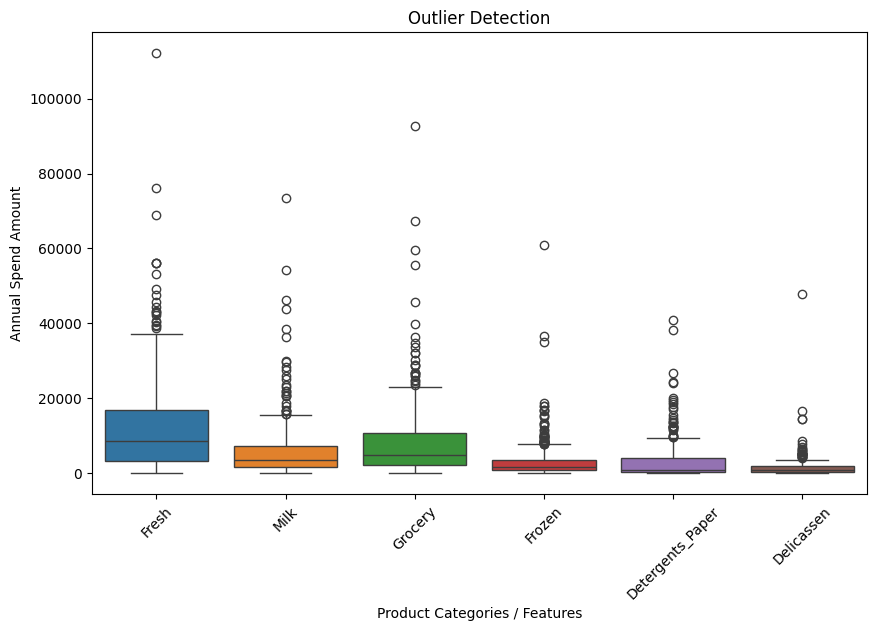

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.xlabel("Product Categories / Features")
plt.ylabel("Annual Spend Amount")
plt.show()

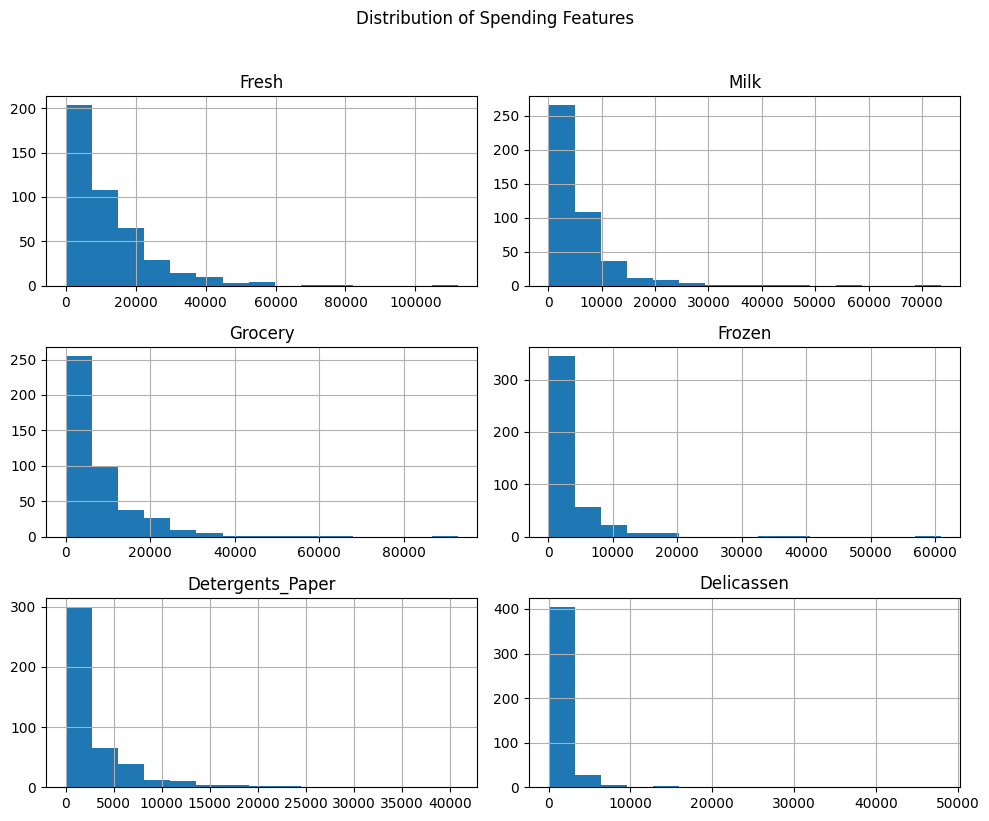

In [8]:
df[numeric_cols].hist(bins=15, figsize=(10, 8))
plt.suptitle("Distribution of Spending Features", y=1.02)
plt.tight_layout()
plt.show()

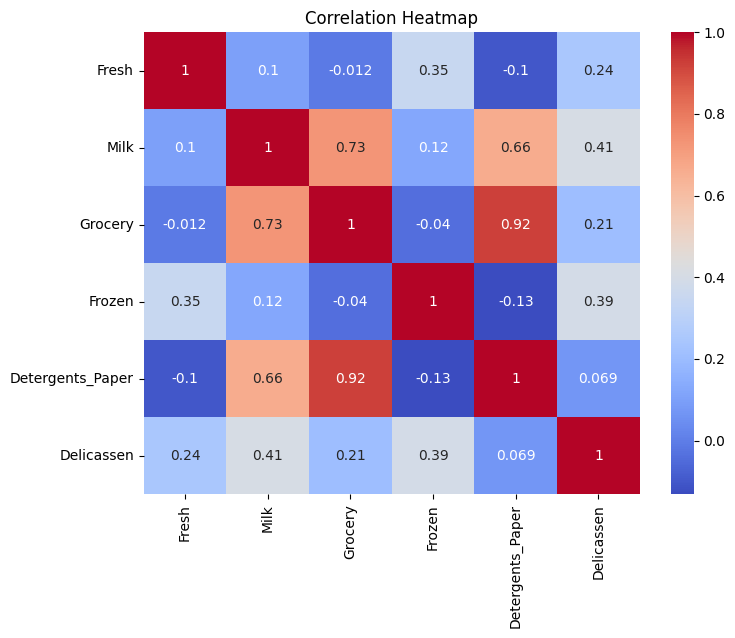

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

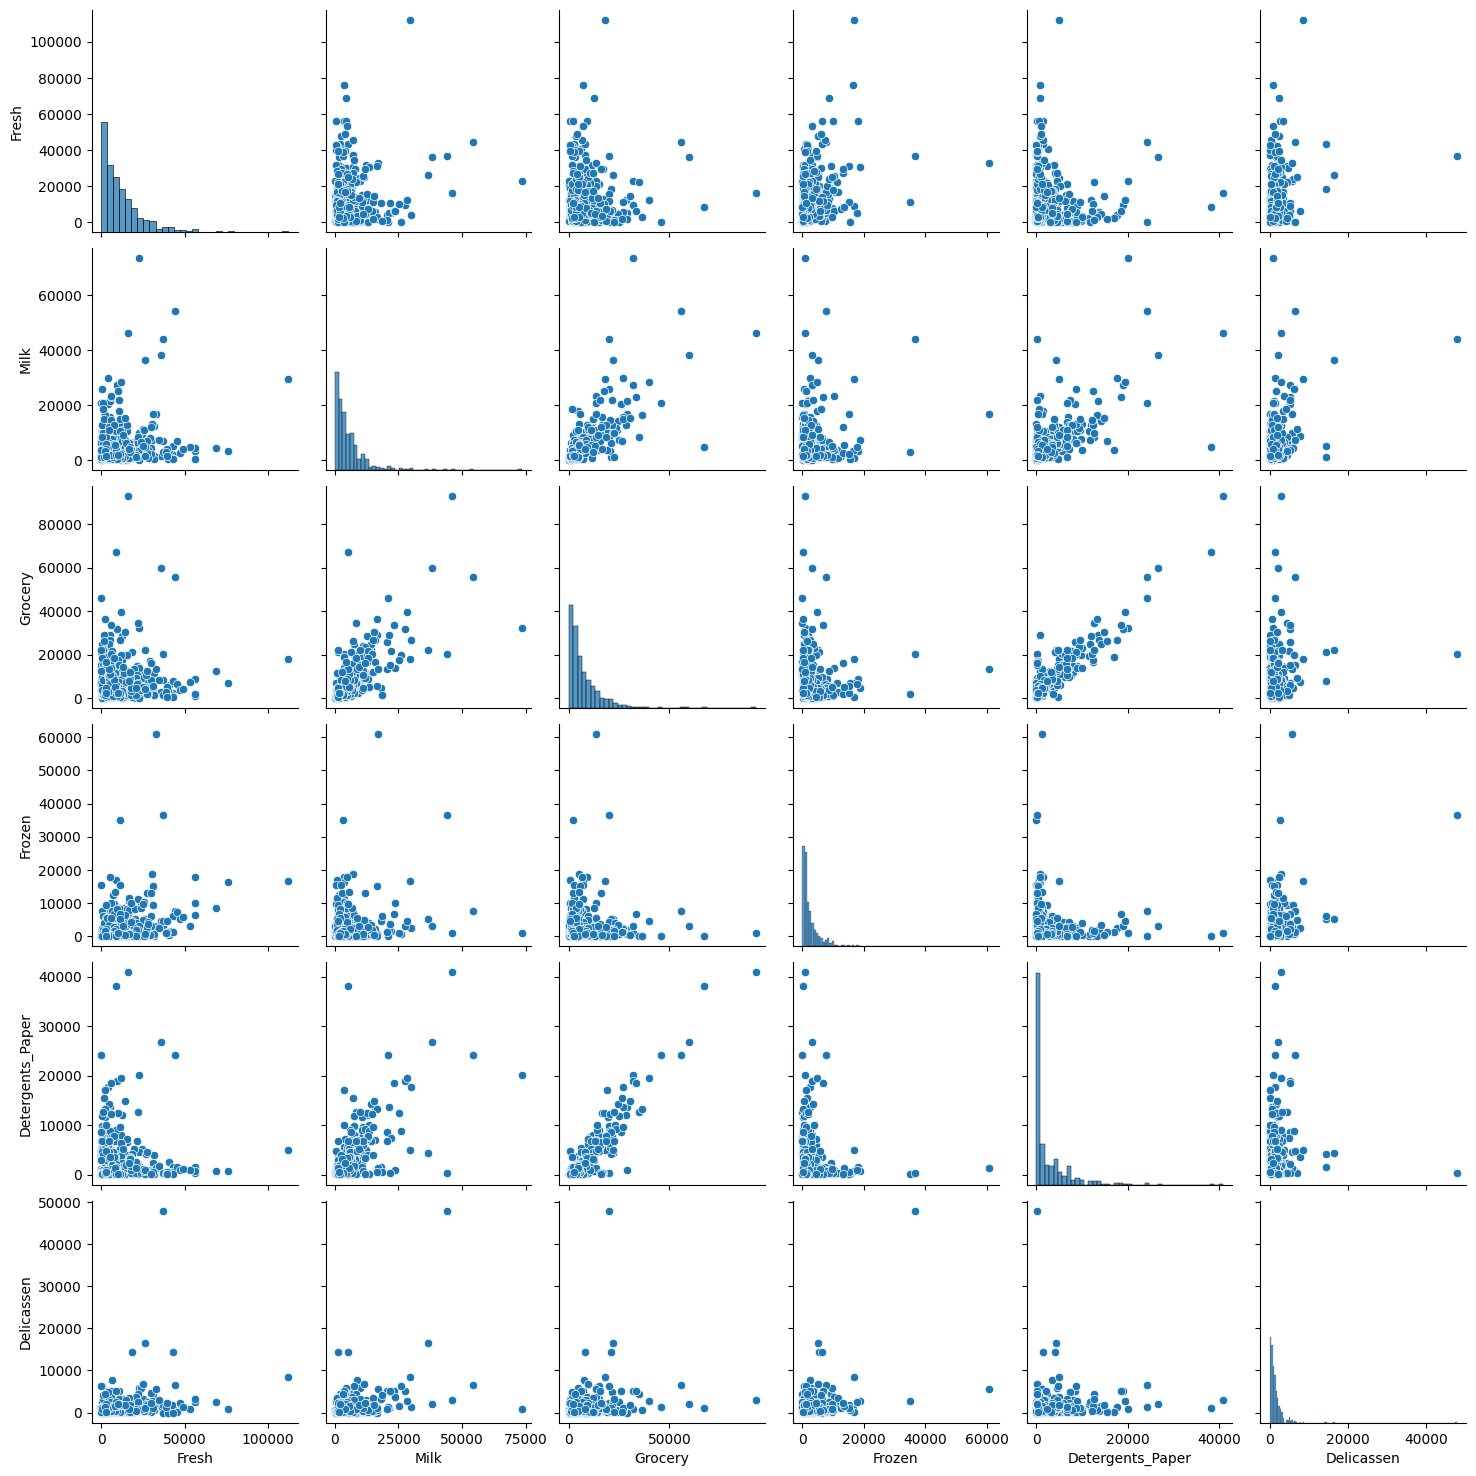

In [25]:
sns.pairplot(df[numeric_cols])
plt.show()

In [11]:
X = df[numeric_cols]
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

In [8]:
# scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:6])  # Assuming first 6 columns were scaled
# scaled_df.boxplot(ax=axes[1])
# axes[1].set_title("After Scaling")
# axes[1].set_xticklabels(scaled_df.columns, rotation=45)

# plt.tight_layout()
# plt.show()

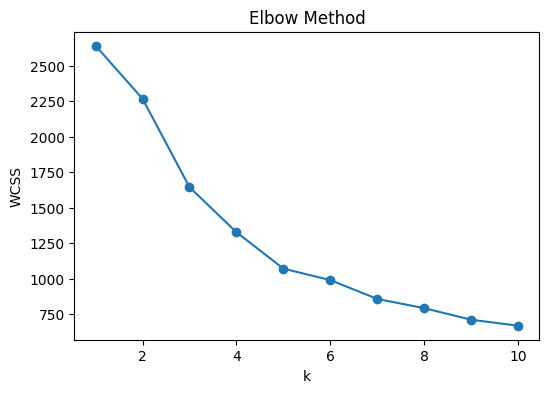

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    wcss.append(km.inertia_)  # WCSS

plt.figure(figsize=(6,4))
plt.plot(K, wcss, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

k=2, silhouette=0.400
k=3, silhouette=0.458
k=4, silhouette=0.349
k=5, silhouette=0.369
k=6, silhouette=0.276
k=7, silhouette=0.277
k=8, silhouette=0.324
k=9, silhouette=0.295
k=10, silhouette=0.229


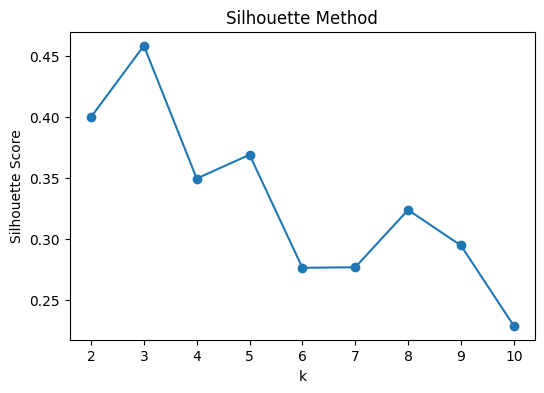

In [14]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette={sil:.3f}")

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

In [15]:
best_k = 3  # based on silhouette & elbow

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


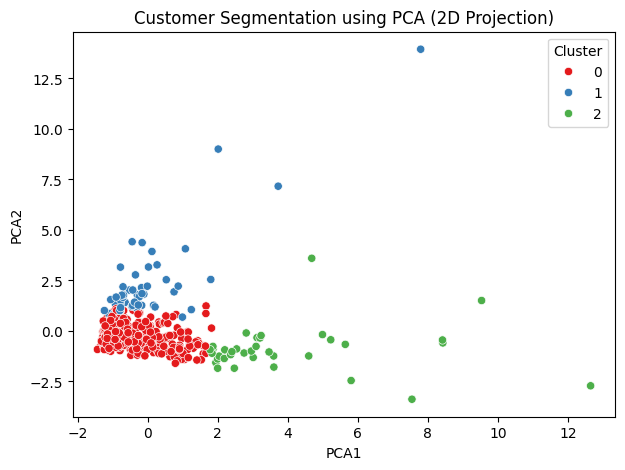

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df["PCA1"] = pca_data[:, 0]
df["PCA2"] = pca_data[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set1"
)
plt.title("Customer Segmentation using PCA (2D Projection)")
plt.show()

In [17]:
numeric_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

cluster_profile = df.groupby("Cluster")[numeric_cols].mean().round(2)
cluster_profile

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8935.50,4228.53,5848.03,2167.23,1913.61,1102.12
1,34540.11,5860.36,6122.62,9841.74,981.47,3664.25
2,8704.86,20534.41,30466.24,1932.62,14758.84,2459.35


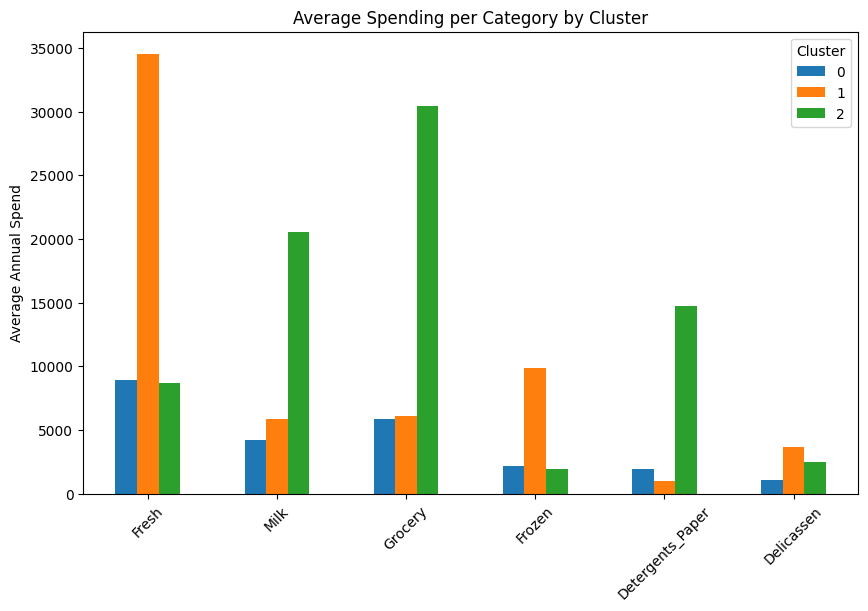

In [18]:
cluster_profile.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Spending per Category by Cluster")
plt.ylabel("Average Annual Spend")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Agglomorative Hierarchical Structure

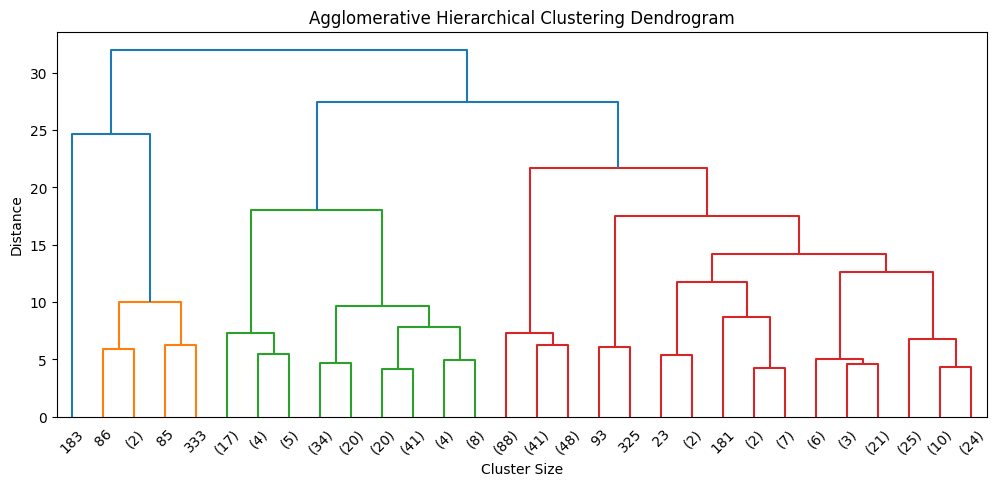

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(12, 5))
Z = linkage(X_scaled, method="ward")
dendrogram(Z, truncate_mode="lastp", p=30)
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
df["AggloCluster"] = agg_model.fit_predict(X_scaled)

df[["Cluster", "AggloCluster"]].head()

,Cluster,AggloCluster
0,0,2
1,0,2
2,0,2
3,0,1
4,1,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

kmeans_train = KMeans(n_clusters=3, random_state=42, n_init="auto")
train_labels = kmeans_train.fit_predict(X_train)
test_labels = kmeans_train.predict(X_test)

In [22]:
sil_train = silhouette_score(X_train, train_labels)
sil_test = silhouette_score(X_test, test_labels)

sil_train, sil_test

(np.float64(0.6059062642613209), np.float64(0.503420118197819))

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

sil_agg = silhouette_score(X_scaled, agg_labels)
sil_agg

np.float64(0.2646091480214908)

In [24]:
product_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df["TotalSpend"] = df[product_cols].sum(axis=1)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,PCA1,PCA2,AggloCluster,TotalSpend
0,2,3,12669,9656,7561,214,2674,1338,0,0.193291,-0.305100,2,34112
1,2,3,7057,9810,9568,1762,3293,1776,0,0.434420,-0.328413,2,33266
2,2,3,6353,8808,7684,2405,3516,7844,0,0.811143,0.815096,2,36610
3,1,3,13265,1196,4221,6404,507,1788,0,-0.778648,0.652754,1,27381
4,2,3,22615,5410,7198,3915,1777,5185,1,0.166287,1.271434,1,46100


In [25]:
channel_counts = df["Channel"].value_counts()

In [26]:
df["Fresh_per_Channel"] = df["Fresh"] / channel_counts[df["Channel"]].values
df["Grocery_per_Channel"] = df["Grocery"] / channel_counts[df["Channel"]].values
df["Milk_per_Channel"] = df["Milk"] / channel_counts[df["Channel"]].values

In [27]:
df["Region_Avg_Grocery"] = df.groupby("Region")["Grocery"].transform("mean")
df["Region_Avg_Fresh"] = df.groupby("Region")["Fresh"].transform("mean")
df["Region_Avg_Milk"] = df.groupby("Region")["Milk"].transform("mean")

In [28]:
df["Cluster"] = kmeans.labels_

In [29]:
df = pd.get_dummies(df, columns=["Channel", "Region"], drop_first=True)

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fresh                440 non-null    int64  
 1   Milk                 440 non-null    int64  
 2   Grocery              440 non-null    int64  
 3   Frozen               440 non-null    int64  
 4   Detergents_Paper     440 non-null    int64  
 5   Delicassen           440 non-null    int64  
 6   Cluster              440 non-null    int32  
 7   PCA1                 440 non-null    float64
 8   PCA2                 440 non-null    float64
 9   AggloCluster         440 non-null    int64  
 10  TotalSpend           440 non-null    int64  
 11  Fresh_per_Channel    440 non-null    float64
 12  Grocery_per_Channel  440 non-null    float64
 13  Milk_per_Channel     440 non-null    float64
 14  Region_Avg_Grocery   440 non-null    float64
 15  Region_Avg_Fresh     440 non-null    flo

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,PCA1,PCA2,AggloCluster,TotalSpend,Fresh_per_Channel,Grocery_per_Channel,Milk_per_Channel,Region_Avg_Grocery,Region_Avg_Fresh,Region_Avg_Milk,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,0.193291,-0.305100,2,34112,89.218310,53.246479,68.000000,7896.363924,12533.471519,5977.085443,True,False,True
1,7057,9810,9568,1762,3293,1776,0,0.434420,-0.328413,2,33266,49.697183,67.380282,69.084507,7896.363924,12533.471519,5977.085443,True,False,True
2,6353,8808,7684,2405,3516,7844,0,0.811143,0.815096,2,36610,44.739437,54.112676,62.028169,7896.363924,12533.471519,5977.085443,True,False,True
3,13265,1196,4221,6404,507,1788,0,-0.778648,0.652754,1,27381,44.513423,14.164430,4.013423,7896.363924,12533.471519,5977.085443,False,False,True
4,22615,5410,7198,3915,1777,5185,1,0.166287,1.271434,1,46100,159.260563,50.690141,38.098592,7896.363924,12533.471519,5977.085443,True,False,True
